In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 200

In [4]:
# data
df_to_eda = pd.read_csv("../../data/curated/df_to_eda.csv")

In [5]:
# how much data we have on school_step
df_to_eda["school_step"].value_counts()

Médio & Pré-Vestibular    35307
Fundamental II            33390
Fundamental I             18144
Name: school_step, dtype: int64

Como podemos ver aqui, existe uma quantidade bem interessante entre as 3 classes que iremos prever. No FUND-I temos um pouco mais da metade das outras duas classes, mas acreditamos que não será um problema.

In [6]:
df_to_eda

,question_c6,bulletType,school_step
0,base conhecimentos sobre compositor john cage ...,2,Fundamental II
1,achar número somado igual inverso equações rep...,2,Fundamental II
2,complete espaços abaixo artigos determinados i...,4,Fundamental II
3,chuva ácida fenômeno provocado poluição atmosf...,2,Fundamental II
4,anexe nesse espaço foto ilustração,4,Fundamental I
...,...,...,...
86836,leia reportagem responda questão sobre pergunt...,2,Fundamental I
86837,responder questão leia trecho conto prefácio h...,2,Médio & Pré-Vestibular
86838,pais surgiu skate,2,Fundamental II
86839,machos fêmeas mosquitos gênero aedes vivem loc...,2,Fundamental II


# Tamanho das sentenças

As questões vão de 1 à 62275 caracteres por questão
O valor mediano e médio de caracteres por questão é de 161 e de 291, respectivamente.


<AxesSubplot:xlabel='question_c6', ylabel='Count'>

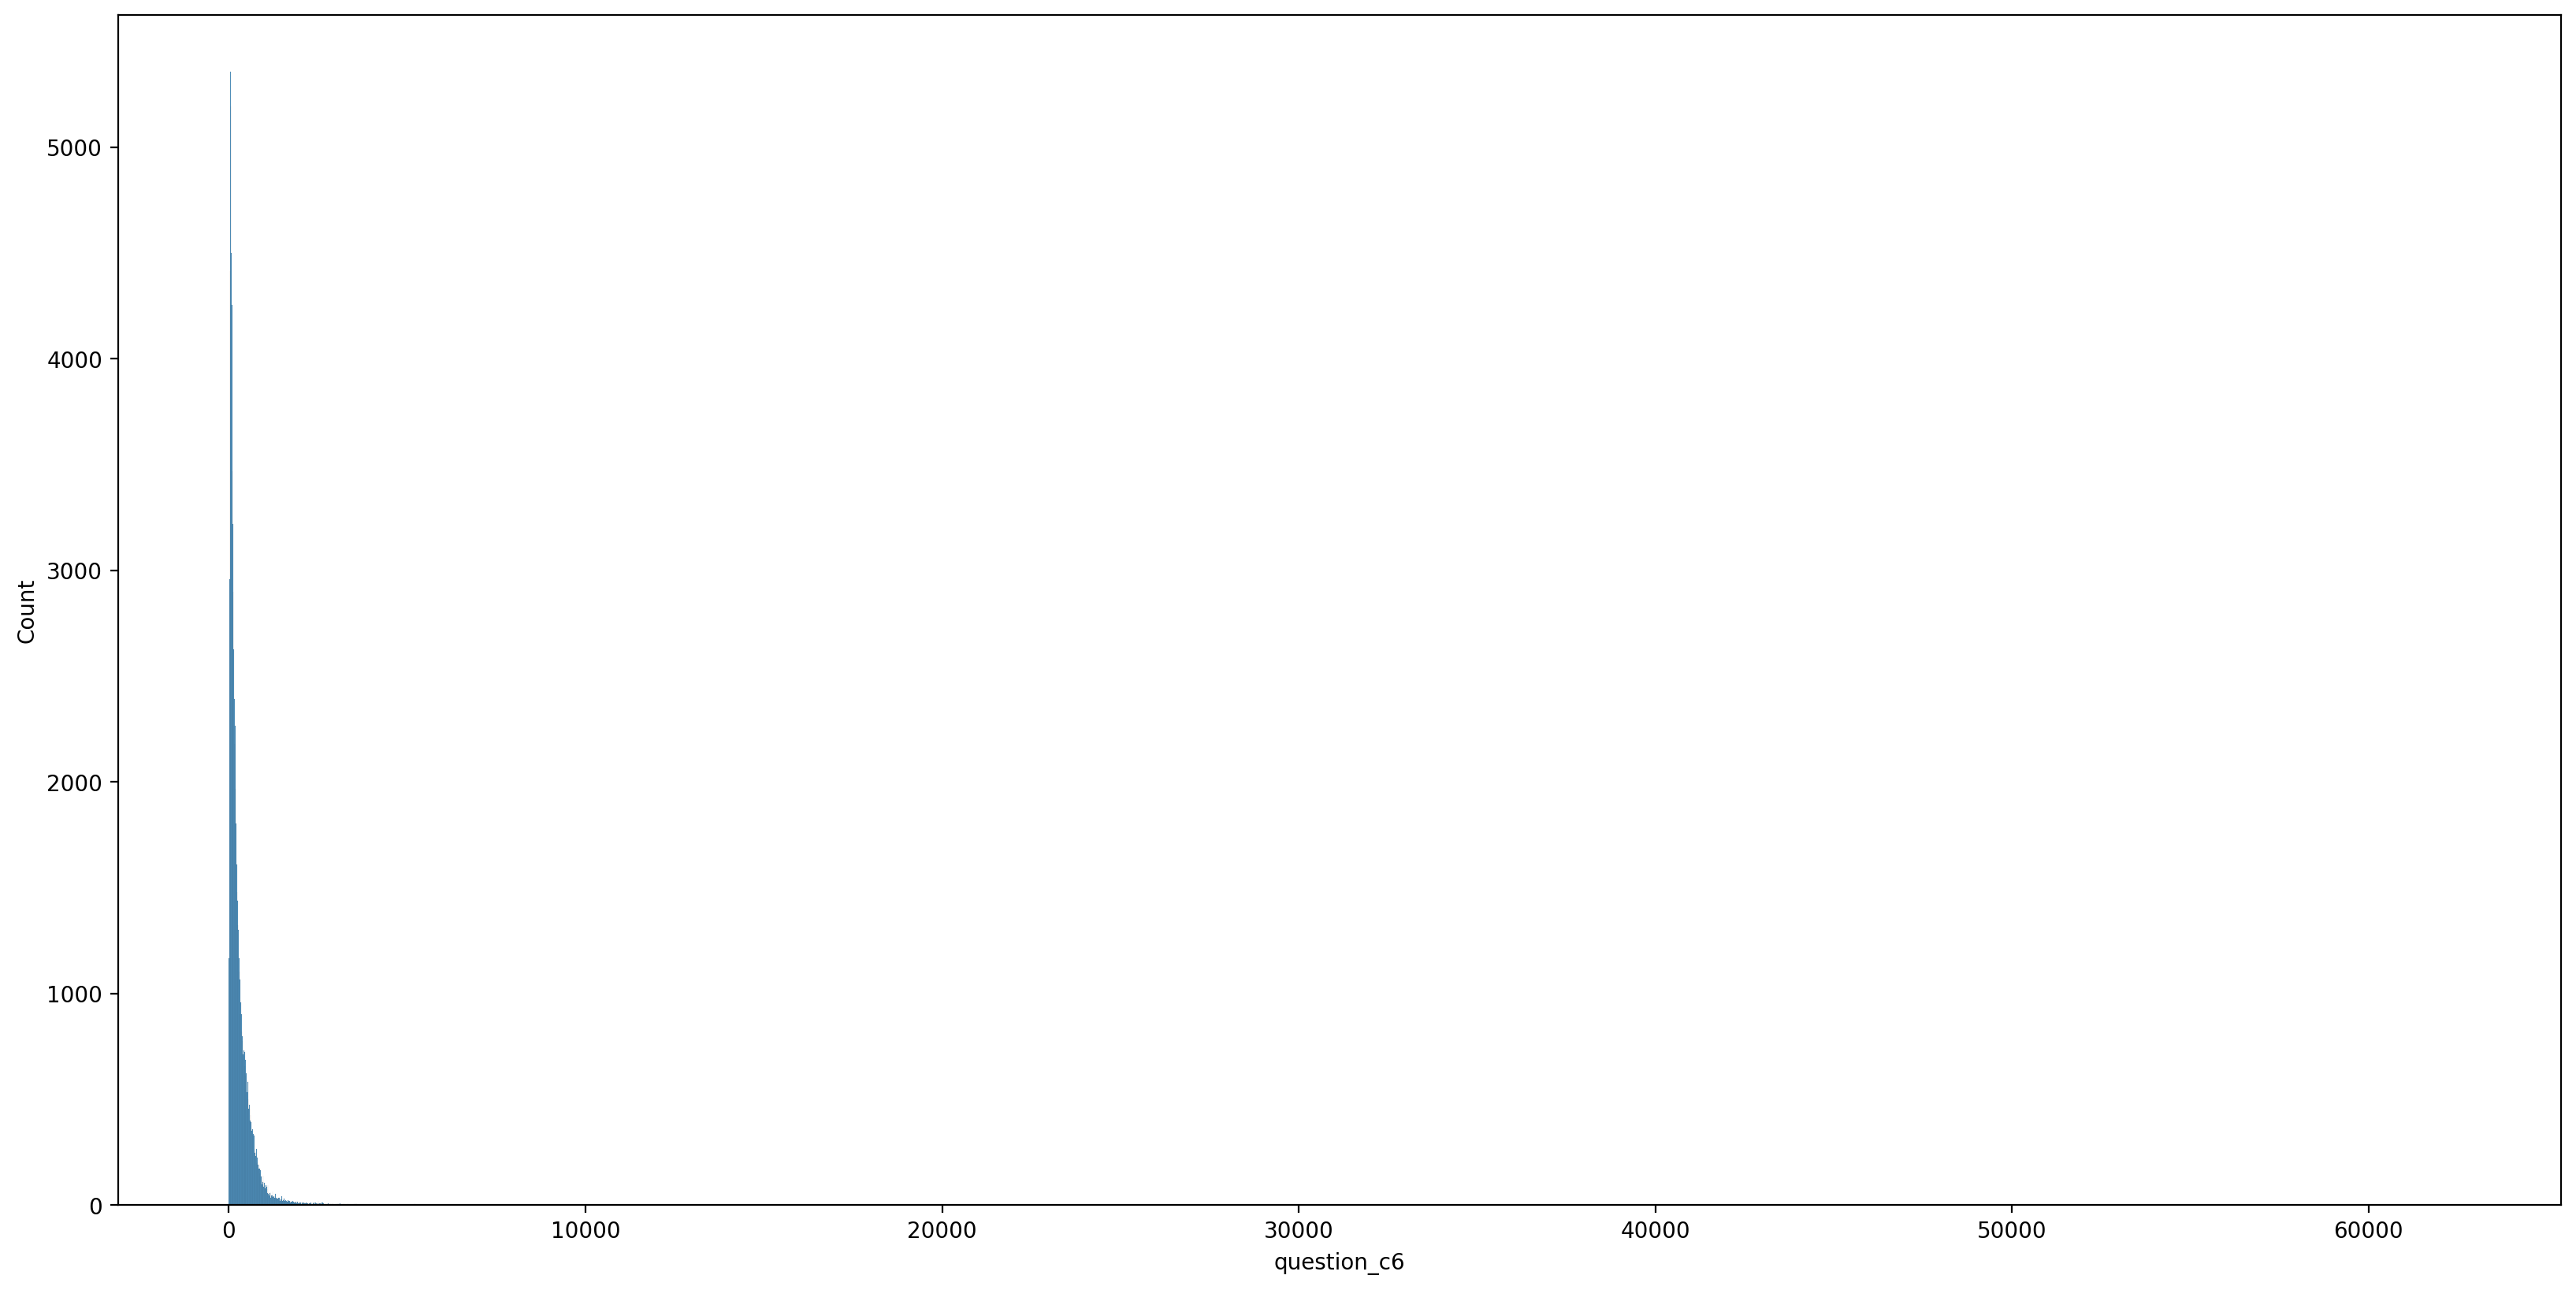

In [7]:
max = df_to_eda['question_c6'].str.len().max()
min = df_to_eda['question_c6'].str.len().min()
median = df_to_eda['question_c6'].str.len().median()
mean = df_to_eda['question_c6'].str.len().mean()

print('As questões vão de %d à %d caracteres por questão' % (min, max))
print('O valor mediano e médio de caracteres por questão é de %d e de %d, respectivamente.' %
(median, mean))

fig, ax = plt.subplots(figsize=(20, 10))

sns.histplot(df_to_eda['question_c6'].str.len(), ax = ax)

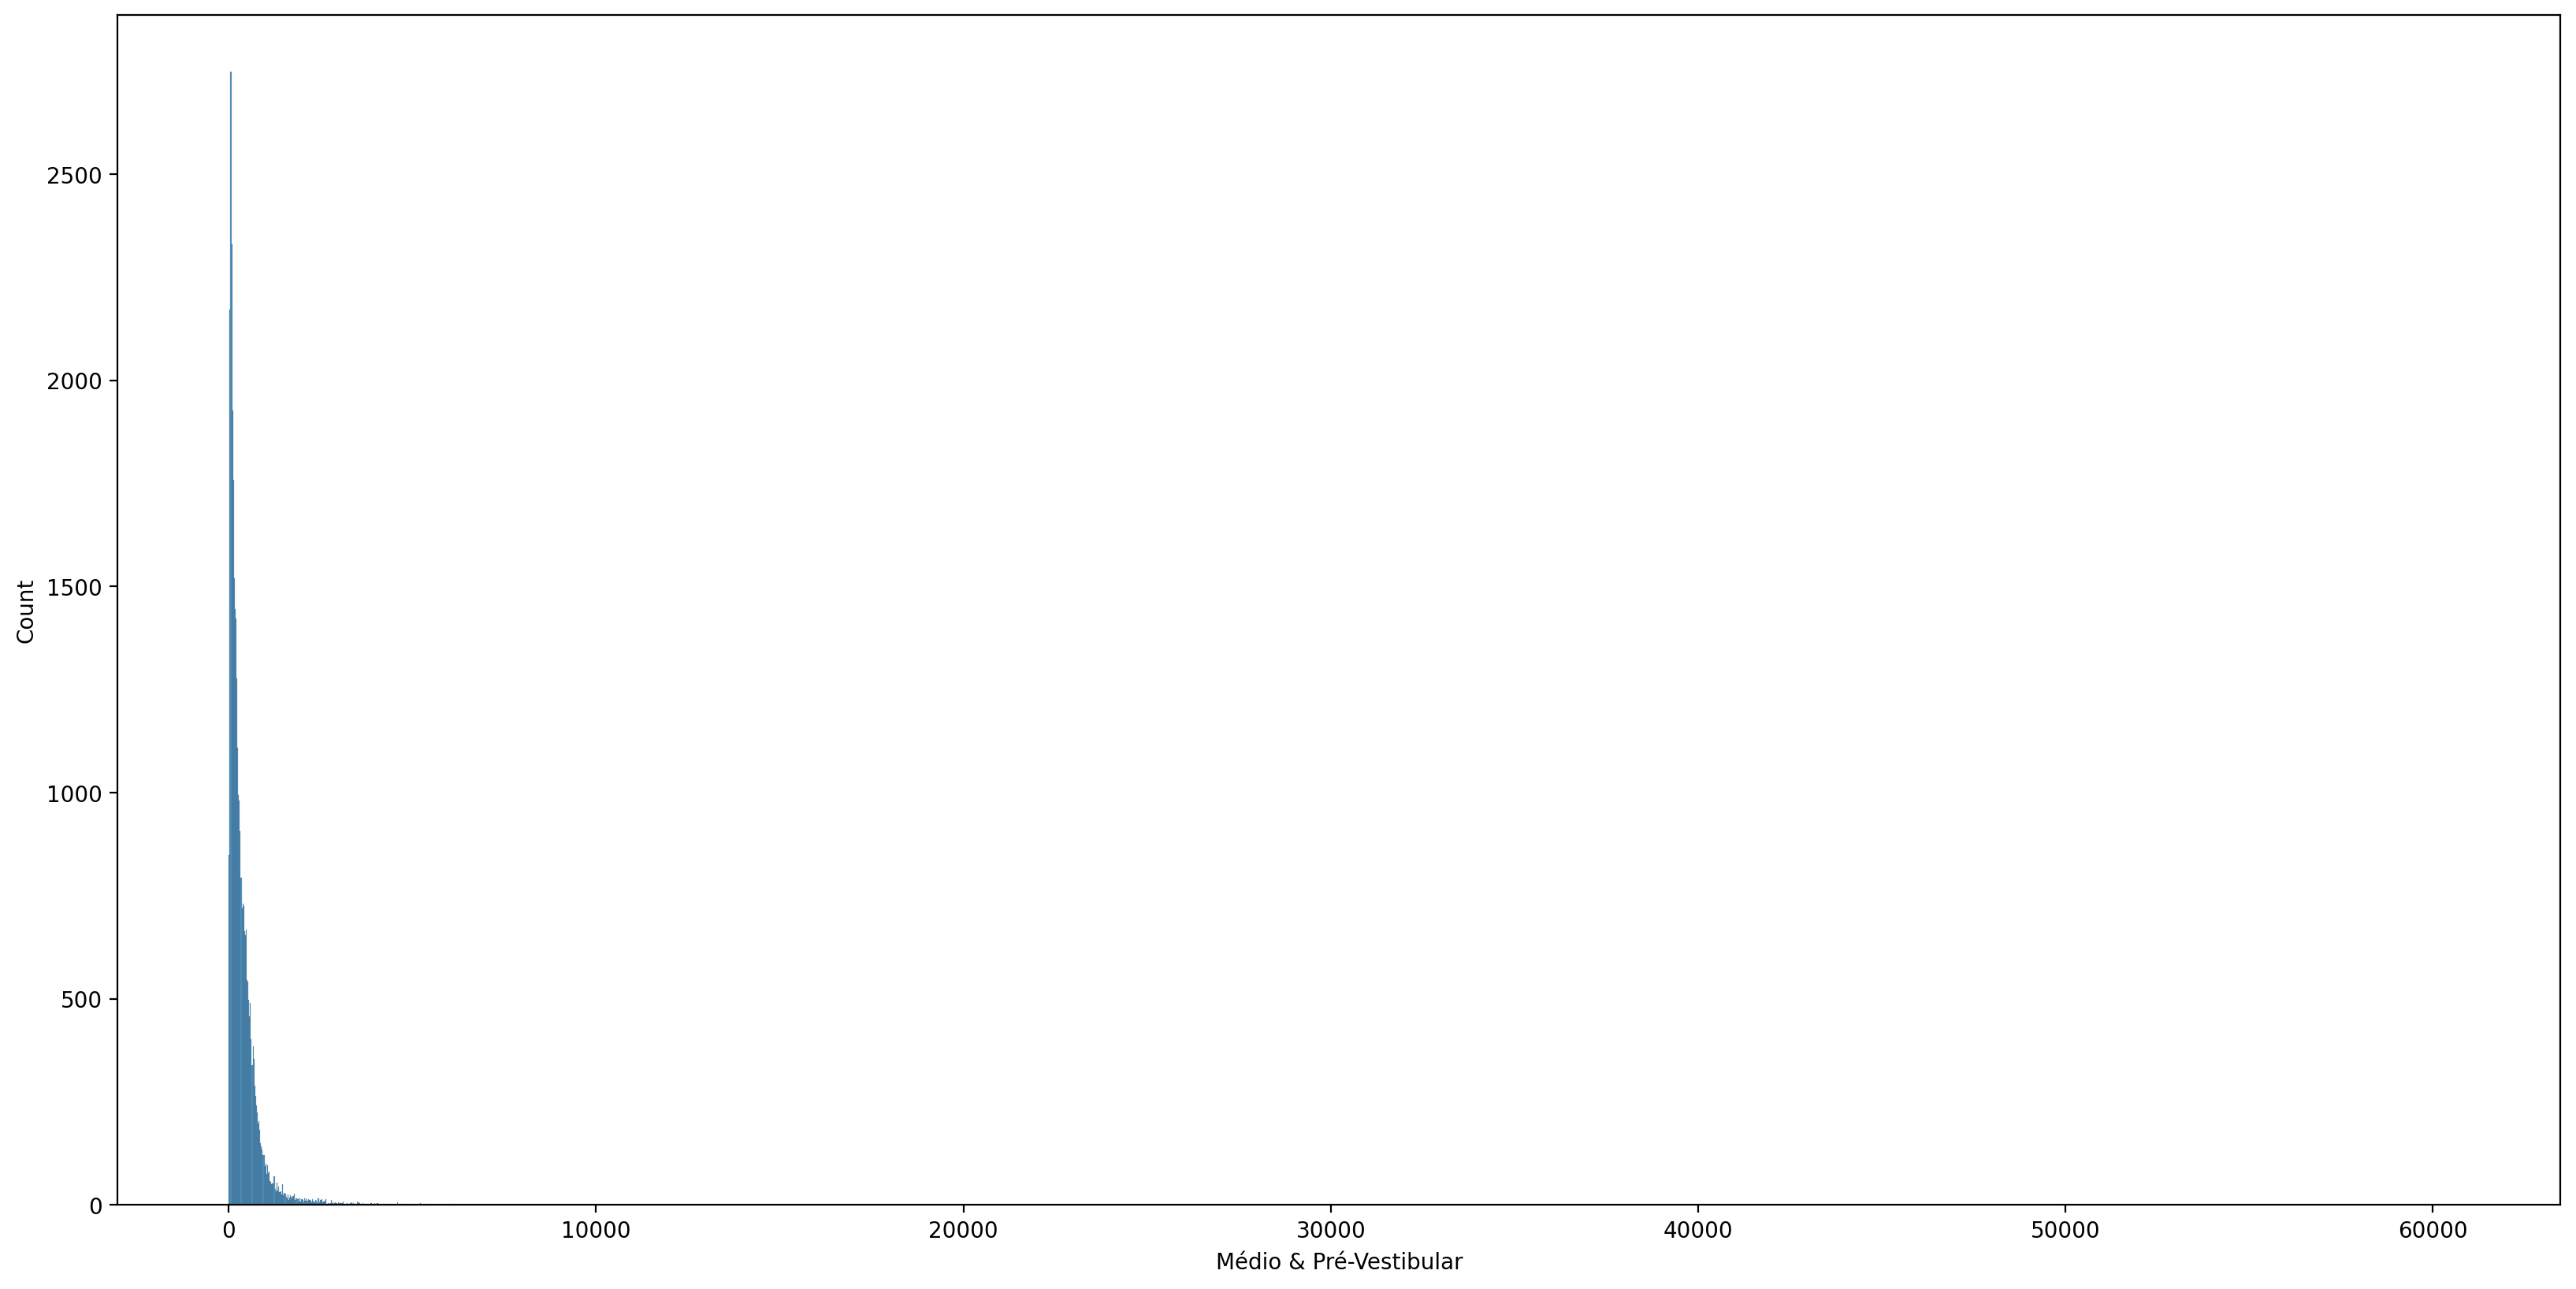

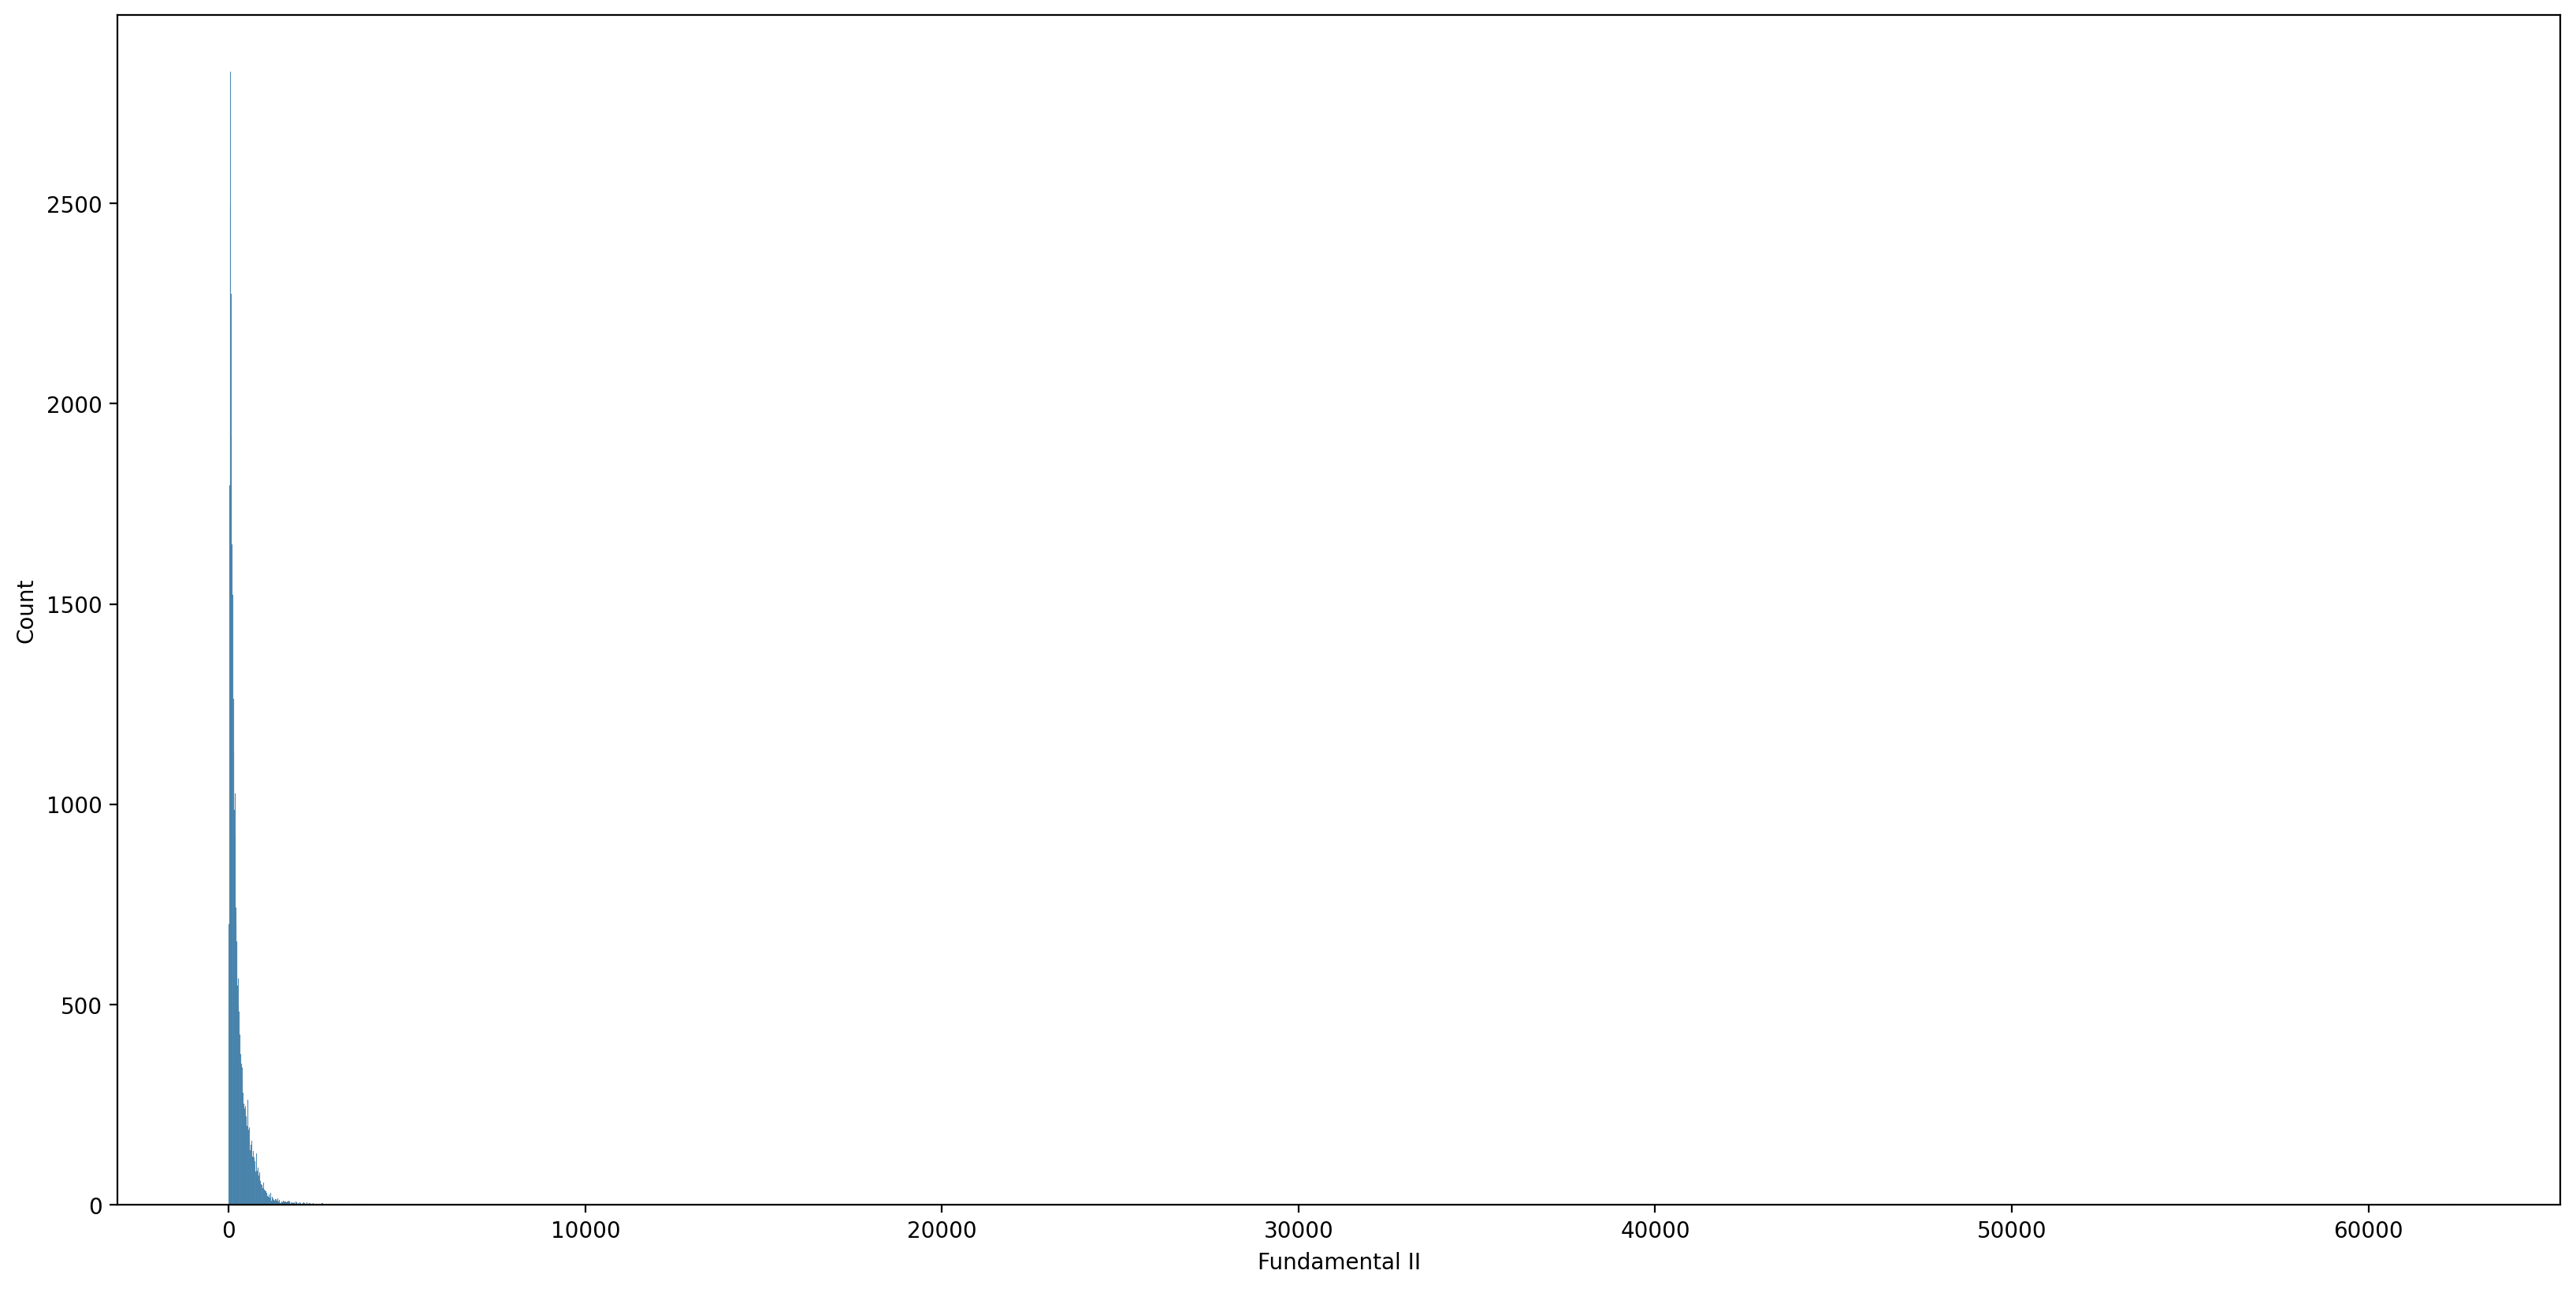

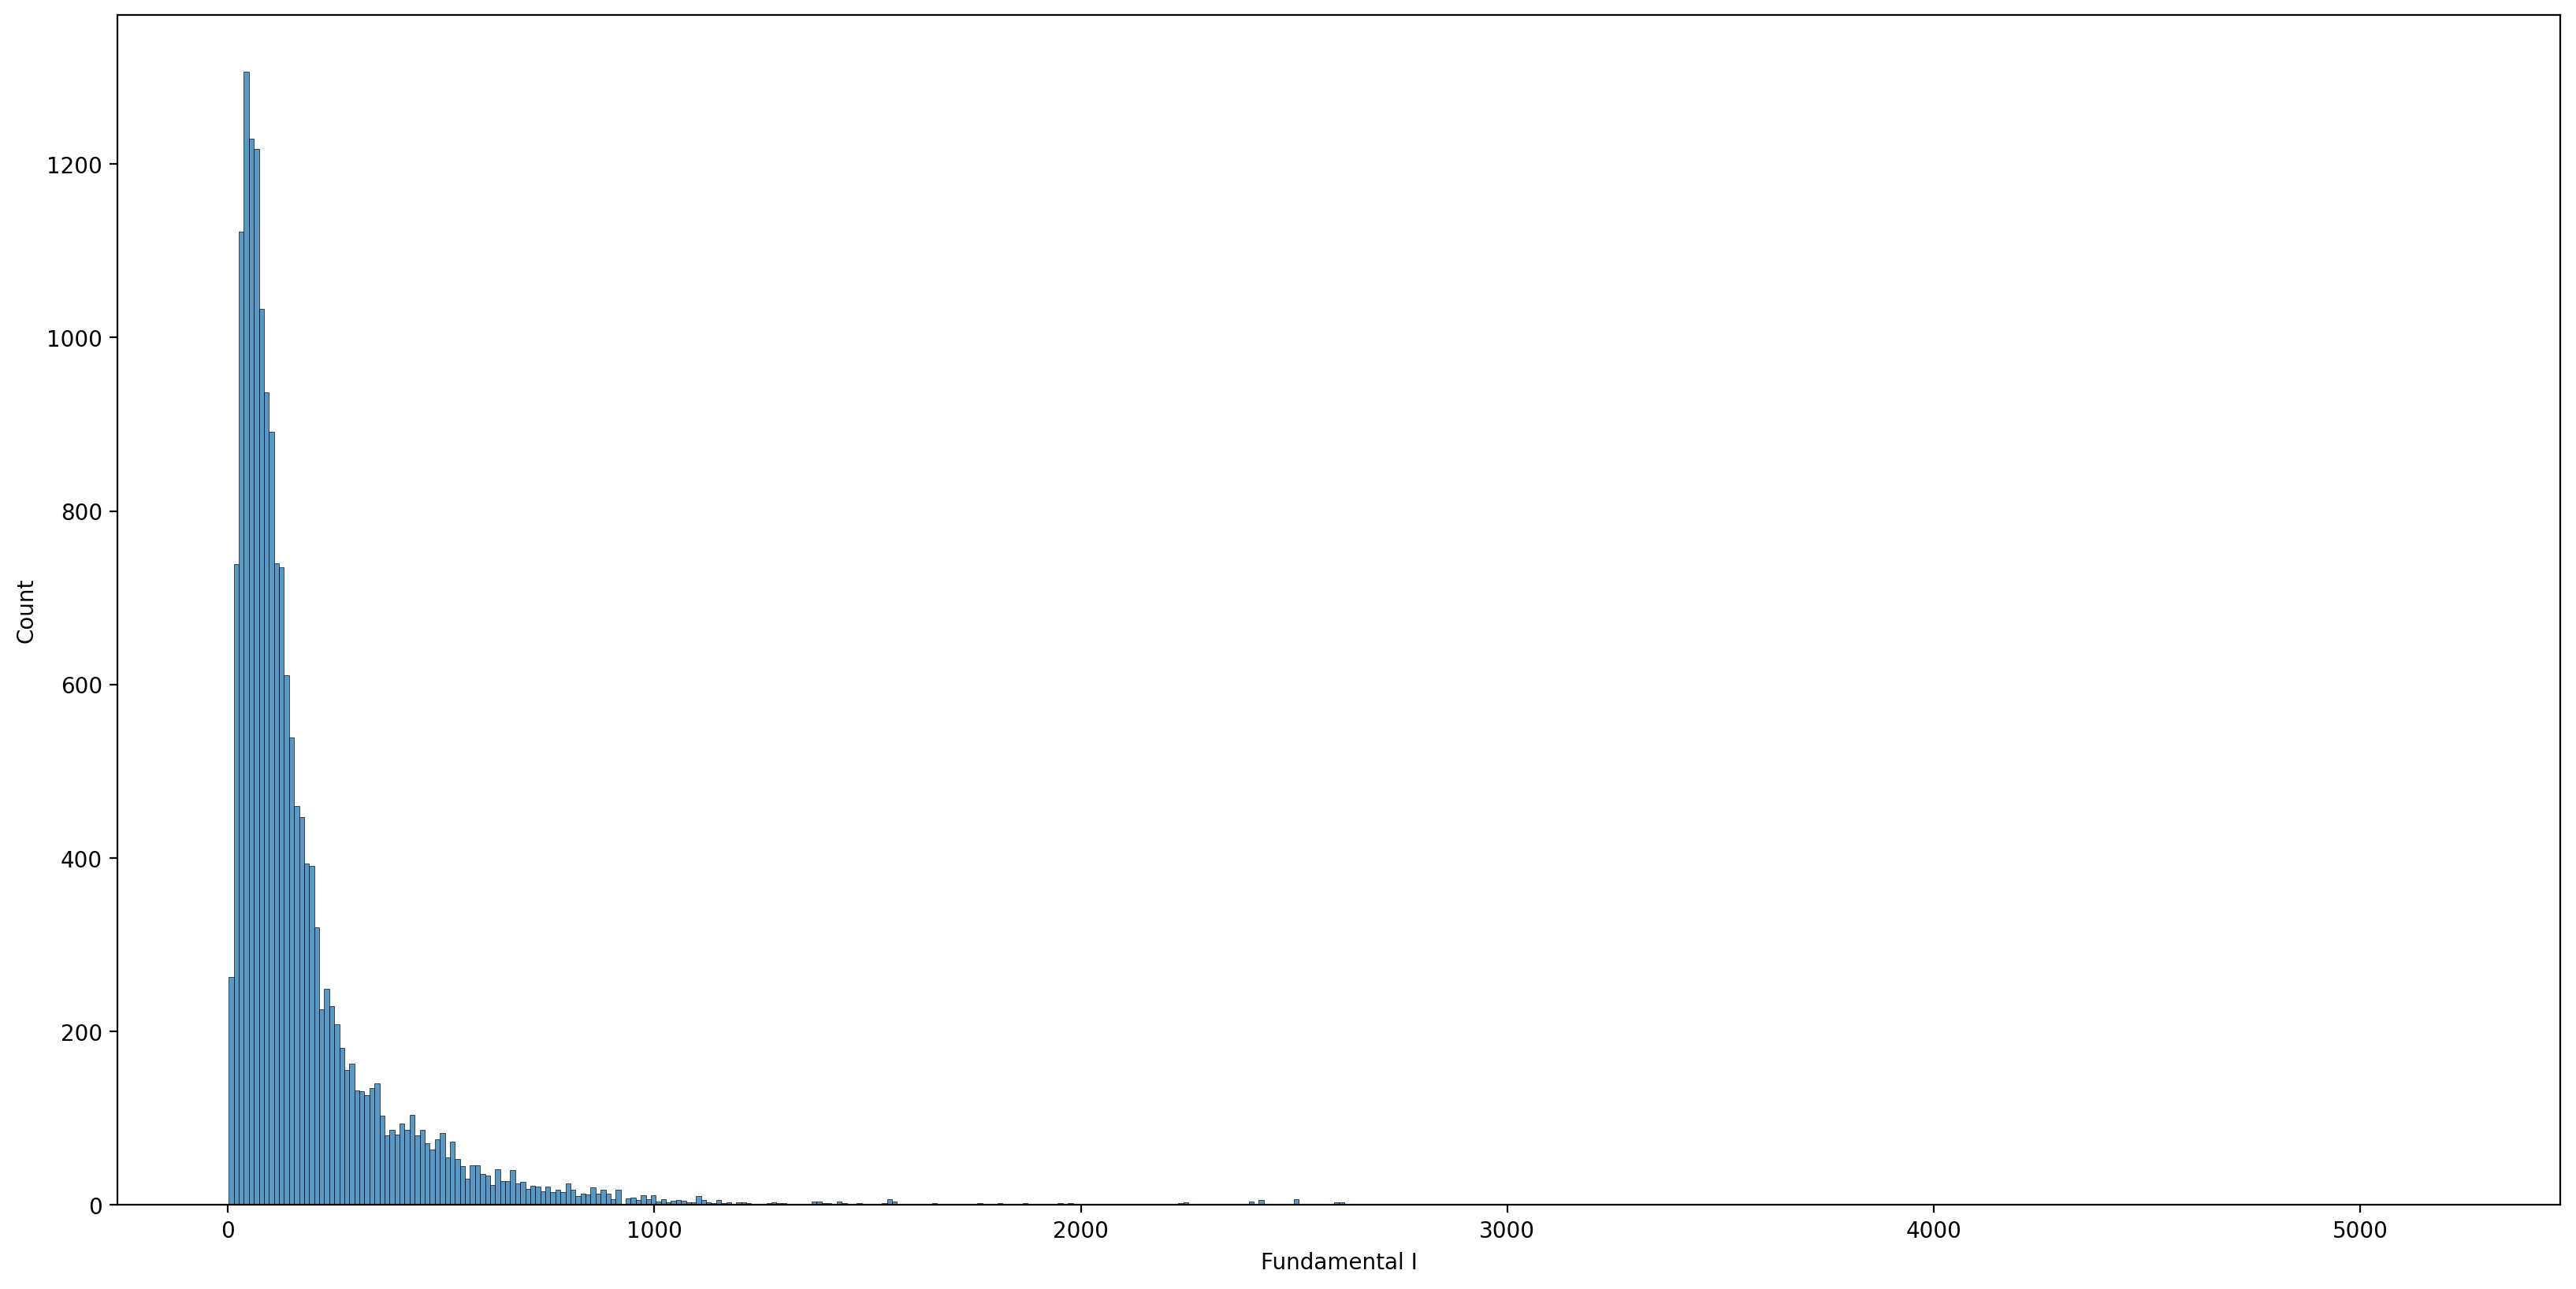

In [8]:
targets = ["Médio & Pré-Vestibular", "Fundamental II", "Fundamental I"]

for target in targets:
    fig, ax = plt.subplots(figsize=(20, 10))

    _ = sns.histplot(df_to_eda[df_to_eda["school_step"] == target]['question_c6'].str.len(), ax = ax)
    plt.xlabel(target)
    plt.show()

Curiosamente temos muitas sentenças de tamanho 1. Provavelmente esses itens não representam nada e precisam ser excluídos.

In [9]:
df_to_eda["len_sentence"] = df_to_eda["question_c6"].str.len()

# filtering values more than 50.000
df_to_eda_less_than_50k = df_to_eda[df_to_eda["len_sentence"] < 50000]

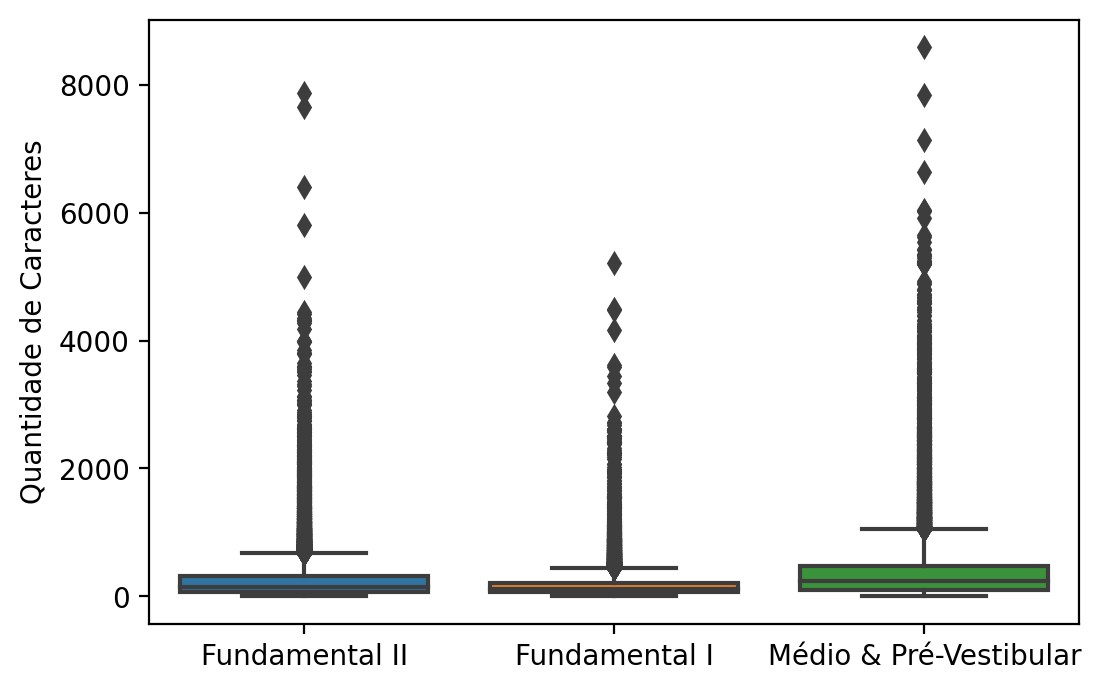

In [10]:
_ = sns.boxplot(x="school_step", y="len_sentence", data=df_to_eda_less_than_50k)
plt.xlabel("")
plt.ylabel("Quantidade de Caracteres")
plt.show()

In [44]:
df_to_eda.sort_values(["len_sentence"])

,question_c6,bulletType,school_step,len_sentence
28603,x,2,Médio & Pré-Vestibular,1.0
13716,r,2,Fundamental II,1.0
71909,x,2,Médio & Pré-Vestibular,1.0
75771,x,2,Médio & Pré-Vestibular,1.0
4024,p,4,Médio & Pré-Vestibular,1.0
...,...,...,...,...
86647,NaN,4,Fundamental I,NaN
86759,NaN,2,Fundamental II,NaN
86782,NaN,2,Fundamental I,NaN
86791,NaN,4,Fundamental II,NaN


In [12]:
df_to_eda['question_c6'].astype("str").apply(len).sort_values()

80830        1
4024         1
48188        1
78086        1
75771        1
         ...  
58817    60452
69735    61967
79472    62275
23050    62275
42658    62275
Name: question_c6, Length: 86841, dtype: int64

In [39]:
# looking at those items with sentence length of 1
df_to_eda[df_to_eda["question_c6"].astype("str").apply(len) == 3]

,question_c6,bulletType,school_step,len_sentence
48,NaN,4,Fundamental I,NaN
140,NaN,2,Fundamental I,NaN
162,NaN,2,Fundamental II,NaN
258,NaN,4,Médio & Pré-Vestibular,NaN
404,NaN,4,Fundamental I,NaN
...,...,...,...,...
86647,NaN,4,Fundamental I,NaN
86759,NaN,2,Fundamental II,NaN
86782,NaN,2,Fundamental I,NaN
86791,NaN,4,Fundamental II,NaN


In [33]:
# lets look at length by sentence
df_to_eda.value_counts(["len_sentence", 'school_step'])
df_to_eda[df_to_eda["question_c6"].astype("str").apply(len) == 30].value_counts(["school_step"])


school_step           
Fundamental II            151
Fundamental I             106
Médio & Pré-Vestibular     72
dtype: int64

In [36]:
df_to_eda[~df_to_eda["question_c6"].astype("str").apply(len).isin([1, 2, 3])].shape


(85711, 4)

In [47]:
# filtering length 1 sentence size items
df_c1 = df_to_eda[df_to_eda["question_c6"].astype("str").apply(len) != 1]


In [48]:
# let's check the length of these sentences again
df_c1['question_c6'].astype("str").apply(len).sort_values()


67100        2
14616        2
47504        2
57554        2
50341        2
         ...  
58817    60452
69735    61967
79472    62275
42658    62275
23050    62275
Name: question_c6, Length: 86816, dtype: int64

In [49]:
df_c1["sentence_len"] = df_c1["question_c6"].astype("str").apply(len)

/tmp/ipykernel_383851/2090979127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c1["sentence_len"] = df_c1["question_c6"].astype("str").apply(len)


In [50]:
df_c1

,question_c6,bulletType,school_step,len_sentence,sentence_len
0,base conhecimentos sobre compositor john cage ...,2,Fundamental II,345.0,345
1,achar número somado igual inverso equações rep...,2,Fundamental II,62.0,62
2,complete espaços abaixo artigos determinados i...,4,Fundamental II,397.0,397
3,chuva ácida fenômeno provocado poluição atmosf...,2,Fundamental II,97.0,97
4,anexe nesse espaço foto ilustração,4,Fundamental I,34.0,34
...,...,...,...,...,...
86836,leia reportagem responda questão sobre pergunt...,2,Fundamental I,100.0,100
86837,responder questão leia trecho conto prefácio h...,2,Médio & Pré-Vestibular,1424.0,1424
86838,pais surgiu skate,2,Fundamental II,17.0,17
86839,machos fêmeas mosquitos gênero aedes vivem loc...,2,Fundamental II,405.0,405


Sabemos que apesar de termo removido as stopwords, existem palavras específicas desse contexto que não representam muito para o problema que temos. Porém, para melhor visualizá-las, vamos plotar uma wordcloud em todas as sentenças do dataset.

In [51]:
# plot wordcloud

tokens = []

text_list = df_c1["question_c6"].values
_ = [tokens.extend(word_tokenize(str(text))) for text in text_list]


In [52]:
counting_tokens = Counter(tokens)

In [53]:
count_tokens_df = pd.DataFrame({"words": counting_tokens.keys(), "count": counting_tokens.values()})

In [54]:
count_tokens_df.sort_values(["count"], ascending=False)

,words,count
703,the,21275
266,texto,16179
2,sobre,15918
131,ser,12483
39,alternativa,11670
...,...,...
95966,jcnet,1
95967,sempredadores,1
95968,avancam,1
22061,loosely,1


In [55]:
count_tokens_df["q_groups"] = pd.qcut(count_tokens_df["count"], q=[.1, .5, .6, .7, .8, .9, .99, .999, 1])
count_tokens_df.value_counts("q_groups")

q_groups
(0.999, 2.0]           75303
(2.0, 3.0]             15736
(9.0, 25.0]            13448
(25.0, 378.0]          12616
(3.0, 5.0]             11392
(5.0, 9.0]             10619
(378.0, 2454.122]       1264
(2454.122, 21275.0]      141
dtype: int64

In [56]:
count_tokens_df["q_groups"] = count_tokens_df["q_groups"].astype("str")
count_tokens_df

,words,count,q_groups
0,base,4434,"(2454.122, 21275.0]"
1,conhecimentos,1632,"(378.0, 2454.122]"
2,sobre,15918,"(2454.122, 21275.0]"
3,compositor,71,"(25.0, 378.0]"
4,john,277,"(25.0, 378.0]"
...,...,...,...
140514,alunosonline,1,"(0.999, 2.0]"
140515,planetainvertebrados,1,"(0.999, 2.0]"
140516,especies_ver,1,"(0.999, 2.0]"
140517,id_categoria,1,"(0.999, 2.0]"


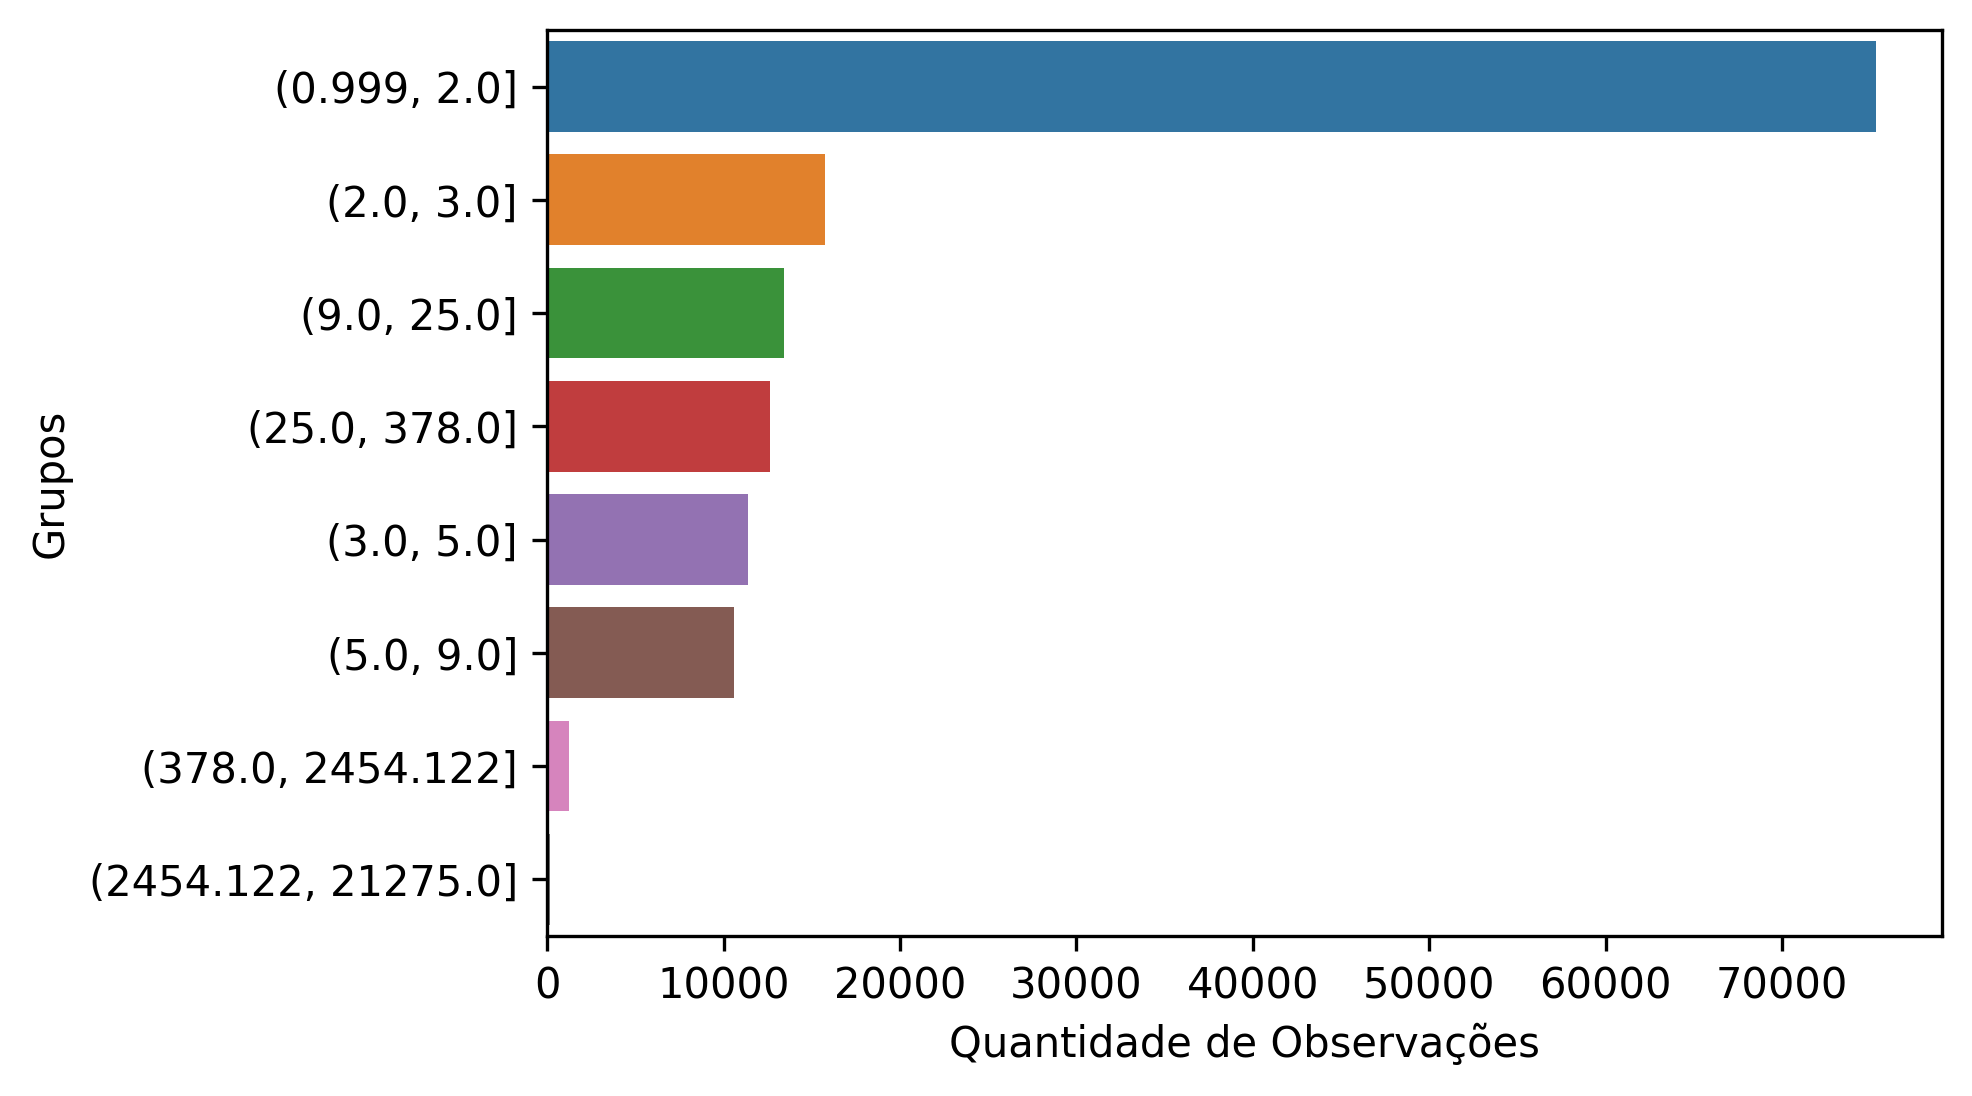

In [60]:
bins_to_plot = count_tokens_df["q_groups"].value_counts().reset_index()
_ = sns.barplot(x="q_groups", y="index", data=bins_to_plot)
plt.xlabel("Quantidade de Observações")
plt.ylabel("Grupos")
plt.show()

Mais de 90% das palavras aparecem de 1 a 25 vezes, precisamos investigar essas palavras.

In [58]:
less_than_25_df = count_tokens_df[count_tokens_df["count"] <= 25]

In [59]:
less_than_25_df

,words,count,q_groups
5,cage,3,"(2.0, 3.0]"
22,orientados,10,"(9.0, 25.0]"
43,somado,22,"(9.0, 25.0]"
45,inverso,25,"(9.0, 25.0]"
54,indeterminados,4,"(3.0, 5.0]"
...,...,...,...
140514,alunosonline,1,"(0.999, 2.0]"
140515,planetainvertebrados,1,"(0.999, 2.0]"
140516,especies_ver,1,"(0.999, 2.0]"
140517,id_categoria,1,"(0.999, 2.0]"
